In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
chiba = gpd.read_file('A002005212020DDSWC12.zip')
matsudo = gpd.read_file('A002005212020DDSWC12207.zip')

<AxesSubplot: >

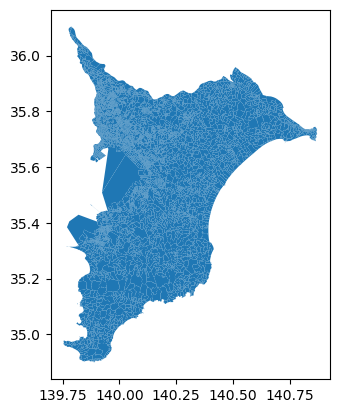

In [3]:
chiba.plot()

In [4]:
jobs = pd.read_csv('tblT001104C12.zip', encoding='Shift-JIS')

In [5]:
jobs.head()

,KEY_CODE,HYOSYO,CITYNAME,NAME,HTKSYORI,HTKSAKI,GASSAN,T001104001,T001104002,T001104003,T001104004,T001104005,T001104006,T001104007,T001104008,T001104009,T001104010,T001104011,T001104012,T001104013
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,総数,Ａ管理的職業従事者,Ｂ専門的・技術的職業従事者,Ｃ事務従事者,Ｄ販売従事者,Ｅサービス職業従事者,Ｆ保安職業従事者,Ｇ農林漁業従事者,Ｈ生産工程従事者,Ｉ輸送・機械運転従事者,Ｊ建設・採掘従事者,Ｋ運搬・清掃・包装等従事者,Ｌ分類不能の職業
1,12101.0,1.0,千葉市中央区,NaN,0.0,NaN,NaN,90423,1599,20127,21991,12178,10489,1873,334,7496,2798,3221,5745,2572
2,121010010.0,2.0,千葉市中央区,青葉町,0.0,NaN,NaN,1247,44,395,359,148,96,18,3,56,23,22,57,26
3,121010020.0,2.0,千葉市中央区,赤井町,0.0,NaN,NaN,678,6,136,147,84,75,20,15,68,37,38,43,9
4,121010030.0,2.0,千葉市中央区,旭町,0.0,NaN,NaN,405,6,98,94,57,47,8,6,25,15,6,26,17


In [6]:
# delete first row
jobs = jobs.drop(jobs.index[0])

In [7]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6767 entries, 1 to 6767
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    6767 non-null   float64
 1   HYOSYO      6767 non-null   float64
 2   CITYNAME    6767 non-null   object 
 3   NAME        6706 non-null   object 
 4   HTKSYORI    6767 non-null   float64
 5   HTKSAKI     57 non-null     float64
 6   GASSAN      52 non-null     object 
 7   T001104001  6767 non-null   object 
 8   T001104002  6767 non-null   object 
 9   T001104003  6767 non-null   object 
 10  T001104004  6767 non-null   object 
 11  T001104005  6767 non-null   object 
 12  T001104006  6767 non-null   object 
 13  T001104007  6767 non-null   object 
 14  T001104008  6767 non-null   object 
 15  T001104009  6767 non-null   object 
 16  T001104010  6767 non-null   object 
 17  T001104011  6767 non-null   object 
 18  T001104012  6767 non-null   object 
 19  T001104013  6767 non-null  

In [8]:
# OBJECT から　floatに変換
jobs['T001104001'] = pd.to_numeric(jobs['T001104001'], errors="coerce")
jobs['T001104002'] = pd.to_numeric(jobs['T001104002'], errors="coerce")
jobs['T001104003'] = pd.to_numeric(jobs['T001104003'], errors="coerce")
jobs['T001104004'] = pd.to_numeric(jobs['T001104004'], errors="coerce")
jobs['T001104005'] = pd.to_numeric(jobs['T001104005'], errors="coerce")
jobs['T001104006'] = pd.to_numeric(jobs['T001104006'], errors="coerce")
jobs['T001104007'] = pd.to_numeric(jobs['T001104007'], errors="coerce")
jobs['T001104008'] = pd.to_numeric(jobs['T001104008'], errors="coerce")
jobs['T001104009'] = pd.to_numeric(jobs['T001104009'], errors="coerce")
jobs['T001104010'] = pd.to_numeric(jobs['T001104010'], errors="coerce")
jobs['T001104011'] = pd.to_numeric(jobs['T001104011'], errors="coerce")
jobs['T001104012'] = pd.to_numeric(jobs['T001104012'], errors="coerce")
jobs['T001104013'] = pd.to_numeric(jobs['T001104013'], errors="coerce")

In [9]:
# check
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6767 entries, 1 to 6767
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    6767 non-null   float64
 1   HYOSYO      6767 non-null   float64
 2   CITYNAME    6767 non-null   object 
 3   NAME        6706 non-null   object 
 4   HTKSYORI    6767 non-null   float64
 5   HTKSAKI     57 non-null     float64
 6   GASSAN      52 non-null     object 
 7   T001104001  6521 non-null   float64
 8   T001104002  5740 non-null   float64
 9   T001104003  6418 non-null   float64
 10  T001104004  6473 non-null   float64
 11  T001104005  6396 non-null   float64
 12  T001104006  6439 non-null   float64
 13  T001104007  5739 non-null   float64
 14  T001104008  5802 non-null   float64
 15  T001104009  6457 non-null   float64
 16  T001104010  6268 non-null   float64
 17  T001104011  6279 non-null   float64
 18  T001104012  6385 non-null   float64
 19  T001104013  5878 non-null  

In [10]:
# KEY_CODEをfloatに変換
chiba['KEY_CODE'] = chiba['KEY_CODE'].astype('float')

In [11]:
# join
chiba = chiba.merge(jobs, on='KEY_CODE')

In [12]:
chiba.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 6678 entries, 0 to 6677
Data columns (total 49 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   KEY_CODE    6678 non-null   float64 
 1   PREF        6678 non-null   object  
 2   CITY        6678 non-null   object  
 3   S_AREA      6678 non-null   object  
 4   PREF_NAME   6678 non-null   object  
 5   CITY_NAME   6678 non-null   object  
 6   S_NAME      6676 non-null   object  
 7   KIGO_E      1090 non-null   object  
 8   HCODE       6678 non-null   int64   
 9   AREA        6678 non-null   float64 
 10  PERIMETER   6678 non-null   float64 
 11  R2KAxx      6678 non-null   int64   
 12  R2KAxx_ID   6678 non-null   int64   
 13  KIHON1      6678 non-null   object  
 14  DUMMY1      6678 non-null   object  
 15  KIHON2      6678 non-null   object  
 16  KEYCODE1    6678 non-null   object  
 17  KEYCODE2    6678 non-null   object  
 18  AREA_MAX_F  5961 non-null   object  
 19

AttributeError: 'numpy.ndarray' object has no attribute 'set_aspect'

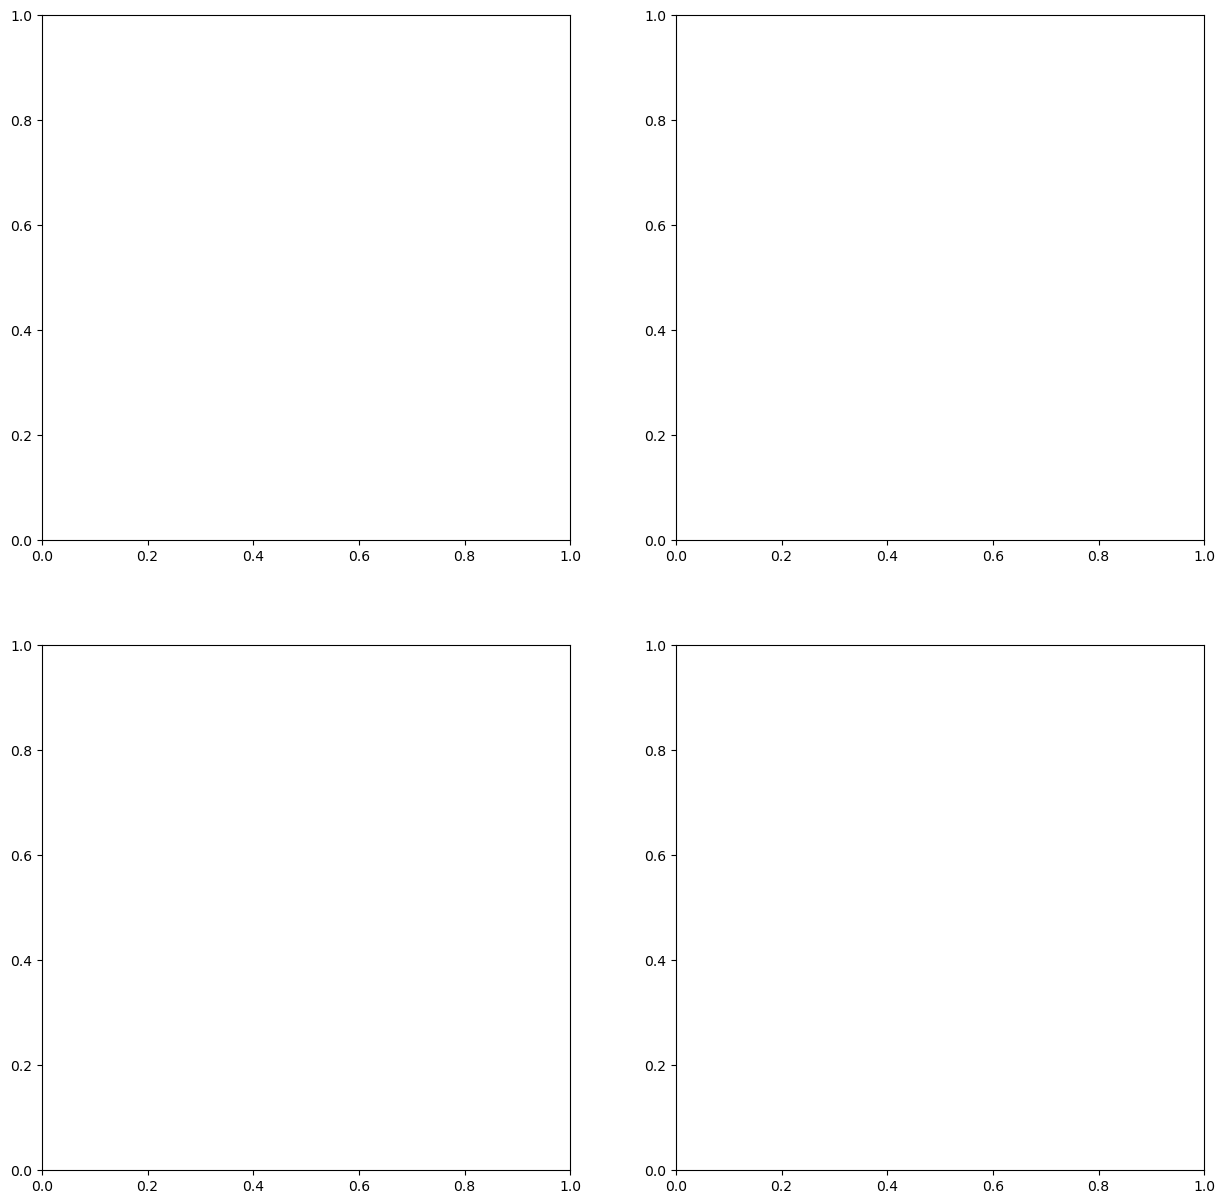

In [25]:
fig, ax = plt.subplots(2,2,figsize=(15,15))

chiba.plot(ax = ax[0],
             column='T001104002',
             legend=True,
             legend_kwds={'shrink': 0.3},
             vmax = 500
             )

chiba.plot(ax = ax[1],
             column='T001104003',
             legend=True,
             legend_kwds={'shrink': 0.3},
             vmax = 500
             )


chiba.plot(ax = ax[2],
             column='T001104004',
             legend=True,
             legend_kwds={'shrink': 0.3},
             vmax = 500
             )

chiba.plot(ax = ax[3],
             column='T001104004',
             legend=True,
             legend_kwds={'shrink': 0.3},
             vmax = 500
             )

ax[0].axis('off')
ax[1].axis('off')

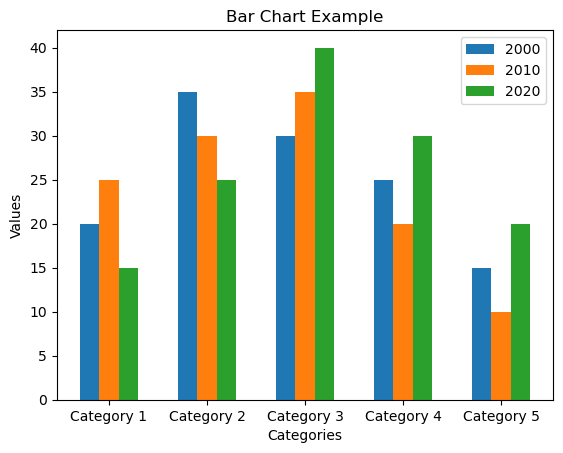

In [26]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5']
values_2000 = [20, 35, 30, 25, 15]
values_2010 = [25, 30, 35, 20, 10]
values_2020 = [15, 25, 40, 30, 20]

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
bar_positions_2000 = range(len(categories))
bar_positions_2010 = [pos + bar_width for pos in bar_positions_2000]
bar_positions_2020 = [pos + 2 * bar_width for pos in bar_positions_2000]

# Create the bar chart
plt.bar(bar_positions_2000, values_2000, width=bar_width, label='2000')
plt.bar(bar_positions_2010, values_2010, width=bar_width, label='2010')
plt.bar(bar_positions_2020, values_2020, width=bar_width, label='2020')

# Set the chart title and labels
plt.title('Bar Chart Example')
plt.xlabel('Categories')
plt.ylabel('Values')

# Set the x-axis tick positions and labels
plt.xticks([pos + bar_width for pos in bar_positions_2000], categories)

# Add a legend
plt.legend()

# Display the chart
plt.show()
